In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import os

In [ ]:
cpus = tf.config.experimental.list_physical_devices('CPU')



In [ ]:
len(cpus)

1

In [ ]:
import cv2
import imghdr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/Images'
print(os.path.basename(data_dir))

Images


In [ ]:
os.listdir(data_dir)

['ImageID_6VE3EHPG.jpg',
 'ImageID_TDXY8PR5.jpg',
 'ImageID_RGIP5LV9.jpg',
 'ImageID_G51H1V64.jpg',
 'ImageID_93G9NR3S.jpg',
 'ImageID_LY416ETA.jpg',
 'ImageID_IHGXGZD6.jpg',
 'ImageID_DY6NR4DE.jpg',
 'ImageID_CNKA0QG0.jpg',
 'ImageID_HCJIQGNR.jpg',
 'ImageID_AND2BBTY.jpg',
 'ImageID_CYRFB5IJ.jpg',
 'ImageID_NSHRCK2N.jpg',
 'ImageID_GCEXKLEB (1).jpg',
 'ImageID_53WXWYLU.jpg',
 'ImageID_LB0SIWYY.jpg',
 'ImageID_LV2JXRBN.jpg',
 'ImageID_LOYAKMV1.jpg',
 'ImageID_RSKPK74G.jpg',
 'ImageID_2B4WWZ90.jpg',
 'ImageID_G3H67LOS.jpg',
 'ImageID_QWSAQ4S5.jpg',
 'ImageID_RVRS3L1J.jpg',
 'ImageID_QO2G0B0G.jpg',
 'ImageID_O5RY8QEG.jpg',
 'ImageID_ICMNSQNB.jpg',
 'ImageID_K1OCZV31.jpg',
 'ImageID_49X1L6XC.jpg',
 'ImageID_YGVK4CDL.jpg',
 'ImageID_FZDCLPFY.jpg',
 'ImageID_6V6N8BC0.jpg',
 'ImageID_DGBV5DY6.jpg',
 'ImageID_KTH8UV44.jpg',
 'ImageID_6BYHNG36.jpg',
 'ImageID_GQ5N7W5H.jpg',
 'ImageID_VA992X8Y.jpg',
 'ImageID_9D7KK5P9.jpg',
 'ImageID_788PIUVM.jpg',
 'ImageID_0H79IT1X.jpg',
 'ImageID_ND7O1VHX.jp

In [ ]:
import pandas as pd
classification = ['Church', 'Enough/Satisfied', 'Friend', 'Love', 'Me', 'Mosque', 'Seat', 'Temple', 'You']

In [ ]:
import csv
trainingSet = []
with open (r"/content/drive/MyDrive/Sign_Lang/Train (1).csv", 'r') as csvfile2:
    newLines = csv.reader(csvfile2)
    dataset = list(newLines)
    for x in range(len(dataset)):
        trainingSet.append(dataset[x])

print(trainingSet[0:10])

[['img_IDS', 'Label'], ['ImageID_33HMDMJ3', 'Temple'], ['ImageID_V5POEX4O', 'Church'], ['ImageID_89CCCCW6', 'Enough/Satisfied'], ['ImageID_GNJXOWX5', 'Me'], ['ImageID_7Q9LOP7R', 'Love'], ['ImageID_0TEORZRD', 'Love'], ['ImageID_8UNM9NYX', 'Me'], ['ImageID_98WYAZT3', 'Enough/Satisfied'], ['ImageID_P8COO08B', 'Me']]


In [ ]:
class_no = []
data = []
for i in range(len(trainingSet)):
    for j in range(len(classification)):
        if trainingSet[i][1] == classification[j]:
            class_no.extend([trainingSet[i][0],j])
print(len(class_no))

12498


In [ ]:
for image in os.listdir(os.path.join(data_dir)):
  print(image)

ImageID_00P5ISSV.jpg
ImageID_0C5UK3OG.jpg
ImageID_00D9H5MH.jpg
ImageID_00SCZHHW.jpg
ImageID_0BWDPEGW.jpg
ImageID_00VEDO1F.jpg
ImageID_00GHFVPR.jpg
ImageID_00HEGX6X.jpg
ImageID_0BXOGB07.jpg
ImageID_00AVE728.jpg
ImageID_0BGG3W3J.jpg
ImageID_0ADV1F31.jpg
ImageID_0A4P0UP4.jpg
ImageID_0ARX5HQM.jpg
ImageID_0C7FSZ03.jpg
ImageID_0AW4WVW4.jpg
ImageID_0BAZXJ9C.jpg
ImageID_00CB7YJ2.jpg
ImageID_0C36MGNK.jpg
ImageID_0BXC5X0Q.jpg
ImageID_0AB8B2QN.jpg
ImageID_0ASP0W4X.jpg
ImageID_0BK795ZW.jpg
ImageID_0BZQ6EY8.jpg
ImageID_0A9XXFWR.jpg
ImageID_0AS527FO.jpg
ImageID_0B4O7FL5.jpg
ImageID_00A5MDP9.jpg


In [ ]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/Images','ImageID_00A5MDP9.jpg'))
type(img)
img.shape

(1280, 720, 3)

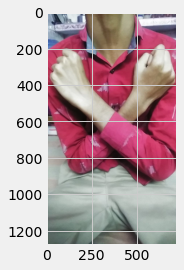

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
!pip install -q keras

In [ ]:
import keras

In [ ]:
import shutil
path1 = "/content/drive/MyDrive/data"
#/content/drive/MyDrive/Images/ImageID_00A5MDP9.jpg
for image in os.listdir(os.path.join(data_dir)):
  image_path = os.path.join(data_dir,image)
  full_file_name = os.path.basename(image_path)
  file_name = os.path.splitext(full_file_name)[0]
  for i in range(len(trainingSet)):
    if trainingSet[i][0] == file_name:
      if trainingSet[i][1] == 'Enough/Satisfied':
        path2 = os.path.join(path1,'Enough')
      else:
        path2 = os.path.join(path1,trainingSet[i][1])
      if os.path.exists(path2) is True:
        path3 = os.path.join(path2, image)
        if os.path.exists(path3) is True:
          continue
        else:
          shutil.copyfile(image_path, path3)
      else:
        os.mkdir(path2)
        path3 = os.path.join(path2, image)
        shutil.copyfile(image_path, path3)


KeyboardInterrupt: ignored

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 6249 files belonging to 9 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
#0 - Church
#1 - Enough
#2 - Friend
#3 - Love
#4 - Me
#5 - Mosque
#6 - Seat
#7 - Temple
#8 - You
batch = data_iterator.next()
len(batch)
batch[0].shape
batch[1]

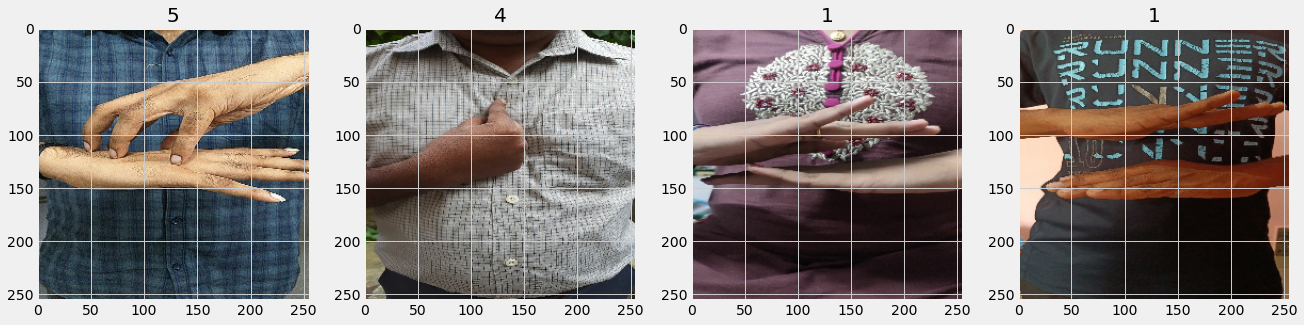

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
  ax[index].imshow(img.astype(int))
  ax[index].title.set_text(batch[1][index])

In [ ]:
print(batch[0].max())
scaled = batch[0]/255
scaled.max()

255.0


1.0

Scale Data:

In [ ]:
data = data.map(lambda x,y:(x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()
batch[0].shape

(32, 256, 256, 3)

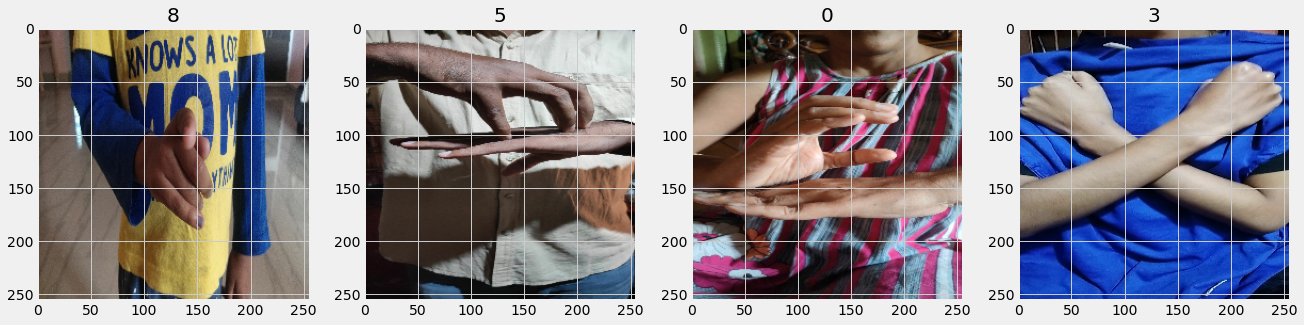

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
  ax[index].imshow(img)
  ax[index].title.set_text(batch[1][index])

In [ ]:
len(data)

196

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
train_size+val_size+test_size

196

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
len(val)

39

In [ ]:
tf.keras.utils.image_dataset_from_directory??

Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

Train

In [ ]:
path4 = '/content/drive/MyDrive/Sign_Lang/logs'
if os.path.exists(path4) is False:
  os.mkdir(path4)

In [ ]:
logdir = '/content/drive/MyDrive/Sign_Lang/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs = 20, validation_data = val,callbacks = [tensorboard_callback])

Epoch 1/20
 52/137 [==========>...................] - ETA: 2:41 - loss: -551908.7500 - accuracy: 0.1100

InvalidArgumentError: ignored